## Exploratory Data Analysis

# Table of Contents
1. [Introduction](#introduction)
2. [Data Loading and Description](#Data_loading_and_Description)
3. [Data Profiling](#Data_Profiling)

    3.1. [Understanding the Data Set](#Understanding_the_Data_Set)    
    3.2. [Pre Profiling](#Pre_profiling)    
    3.3. [Preprocessing](#Preprocessing)    
    3.4. [Post Profiling](#Post_Profiling)

4. [Questions](#questions)

    4.1.[what type of carat the diamonds are produced](#what_type_of_carat_the_diamonds_are_produced)    
    4.2.[what are the various colors in the diamonds](#abc)    
    4.3.[what is the level of clarity](#subt1)    
    4.4.[Typeds of cut of diamonds is perfect](#subt2)    
    4.5.[The Depth and other properties of  diamond](#subt3)    
    4.6.[Total count of diamonds on each category](#subt4)    
    4.7.[Establish  correlation between all features using heat map](#subt5)    
    4.8.[what measure should considered to rate the quality of the diamond](#subt6)    
    4.9.[Draw all kinds of plot relating the variables in the dataset](#subt7)    
    4.10.[Hypothesis:Explaining the Quality of Diamonds](#subt8)

5. [Conclusions](#Conclusions)
    
    

### 1. Problem Statement

The notebooks explores the basic use of Pandas and will cover the basic commands of Exploratory Data Analysis(EDA) which includes cleaning, munging, combining, reshaping, slicing, dicing, and transforming data for analysis purpose.

Exploratory Data Analysis 
Understand the data by EDA and derive simple models with Pandas as baseline. EDA ia a critical and first step in analyzing the data and we do this for below reasons :
Finding patterns in Data
Determining relationships in Data
Checking of assumptions
Preliminary selection of appropriate models
Detection of mistakes

### 2. Data Loading and Description
![Diamond](Diamond.png)

- The dataset consists of the information about properties of Diamond. Various variables present in the dataset includes data of Carat, Cut, Color, Clarity, Depth, table, price, x, y, z. 
- The dataset comprises of __53940 observations of 10 columns__. Below is a table showing names of all the columns and their description.

Column |Column Description|

Carat  |Carat of Diamond  |
Cut    |Cut of Diamond    |
Color  |Color of Diamond  |
Clarity|Clarity of Diamond|
depth  |Depth of Diamond  |
table  |Table             |
price  |Price of Diamond  |
x      |X                 |
y      |Y                 |
z      |Z                 |


### Some Details on Diamond

Step-by-Step Guide: How to Choose a Diamond

    First, identify the diamond shape desired by the recipient. If you do not know and cannot find out, consider round 
    or princess cut.
    Set a carat weight minimum based on the recipient's preferences. If they have their heart set on a one carat diamond, 
    even the most beautiful half carat stone will be a disappointment.
    Start with the highest quality diamond of the shape and carat weight minimum you identified in steps 1 and 2, and 
    begin making concessions in the following order until you arrive at a diamond that fits your budget:
    First, lower the Clarity. See clarity buying tips (below) for more guidance. Go as low as VS2 before making concessions 
    in other areas.
    Next, lower the Color. See color buying tips (below) for more guidance. Go as low as H before making concessions 
    in other areas.
    Finally, lower the Cut. See cut buying tips (below) for more guidance. Go as low as Very Good in round diamonds, 
    and Good in fancy shapes before making concessions in other areas.
    If the diamonds that match your revised criteria are close to your budget, consider shaving off some carat weight in 
    order to close the gap. A carat weight difference of 10% or less will be very difficult to detect visually.


### 3. Data Profiing

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

### 3.1 Understanding the Dataset

### Importing Packages

In [1]:
# Importing Libraries
import pandas_profiling
import warnings
import sys                                                                      # Import packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
%matplotlib inline 

warnings.filterwarnings("ignore")


### Importing Dataset

In [2]:
# Importing Dataset - Flights for Project analysis purpose
diamonds = sns.load_dataset("diamonds")
print(diamonds.count())
diamonds.head()

carat      53940
cut        53940
color      53940
clarity    53940
depth      53940
table      53940
price      53940
x          53940
y          53940
z          53940
dtype: int64


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### 3.2 Preprofilng

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [3]:
# Profiling -- Preparing Preprocessing Data
profile = pandas_profiling.ProfileReport(diamonds)
profile.to_file(outputfile="diamonds_before_preprocessing.html")

Here, we have done Pandas Profiling before preprocessing our dataset, so we have named the html file as __diamonds_before_preprocessing.html__. Take a look at the file and see what useful insight you can develop from it. <br/>
Now we will process our data to better understand it

### 3.3 Preprocessing

- Dealing with missing values<br/>
    - 145 duplicate records deleted
    - x, y, z, price are highly correlated 
    - these columns will be dropped for analysis

In [4]:
# Cleansing data
diamonds.drop_duplicates(keep=False, inplace=True)  # Deleting Duplicate Rows
diamonds.drop(columns=['x','y', 'z'], inplace=True)


In [5]:
def carat_category(carat):                                                     # Create a new column "carat_category" that replaces the weight range of carat colmn
    if carat<= 0.3:                                             
        return '1'
    else:
        if carat > 0.3 and carat < 0.4:
            return '2'    
        else:
            if carat > 0.4 and carat < 0.9:
                return '3'
            else:
                return '4'
diamonds['carat_category'] = diamonds['carat'].apply(carat_category)


### 3.4  Post Pandas Profiling

In [6]:
profile = pandas_profiling.ProfileReport(diamonds)
profile.to_file(outputfile="diamonds_after_preprocessing.html")
# 145 Duplicate rows deleted

Now we have preprocessed the data, now the dataset doesnot contain missing values,  So, the pandas profiling report which we have generated after preprocessing will give us more beneficial insights. You can compare the two reports, i.e __diamonds_after_preprocessing.html__ and diamonds_before_preprocessing.html.<br/>

### 4. Questions

### 4.1 what type of carat the diamonds are produced?

Using Distinct on Type and CountPlot

In [7]:
diamonds.sort_values(by=['carat'])
diamonds.groupby(['carat']).count()

,cut,color,clarity,depth,table,price,carat_category
carat,,,,,,,
0.20,12,12,12,12,12,12,12
0.21,9,9,9,9,9,9,9
0.22,5,5,5,5,5,5,5
0.23,293,293,293,293,293,293,293
0.24,254,254,254,254,254,254,254
0.25,212,212,212,212,212,212,212
0.26,253,253,253,253,253,253,253
0.27,233,233,233,233,233,233,233
0.28,198,198,198,198,198,198,198


## 4.2 what are the various colors in the diamonds

Text(0.5,1,'Count of Color in Diamond')

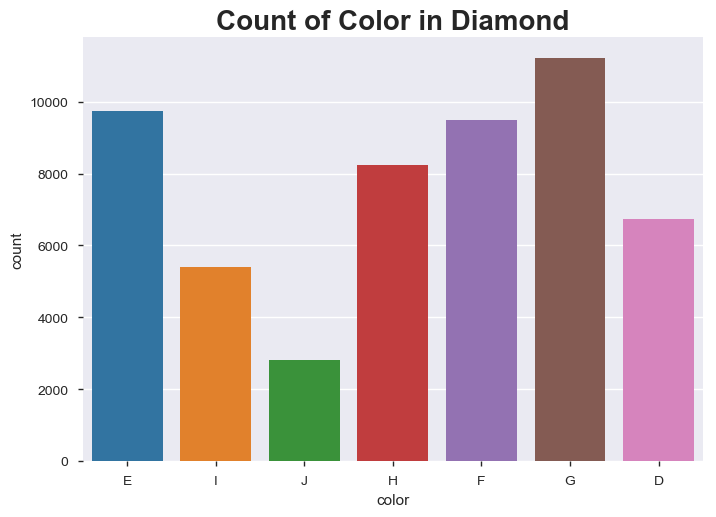

In [8]:
diamonds.groupby(['color']).count()
ax = sns.countplot(x='color',data=diamonds)
plt.title('Count of Color in Diamond', fontsize=20, fontweight="bold")

### 4.3 [what is the level of clarity 4.3

Text(0.5,1,'Count on Clarity Types')

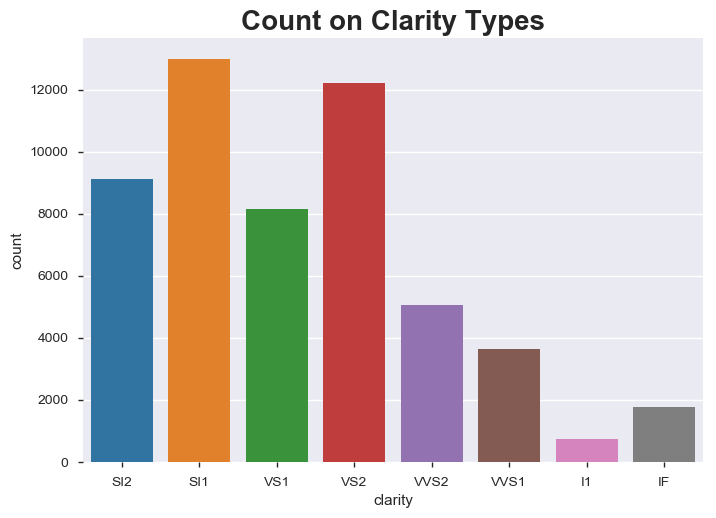

In [9]:
diamonds.groupby(['clarity']).count()
ax = sns.countplot(x='clarity',data=diamonds)
plt.title('Count on Clarity Types', fontsize=20, fontweight="bold")

### 4.4 .Types of cut of diamonds and the price

Text(0.5,1,'Cut Vs Price')

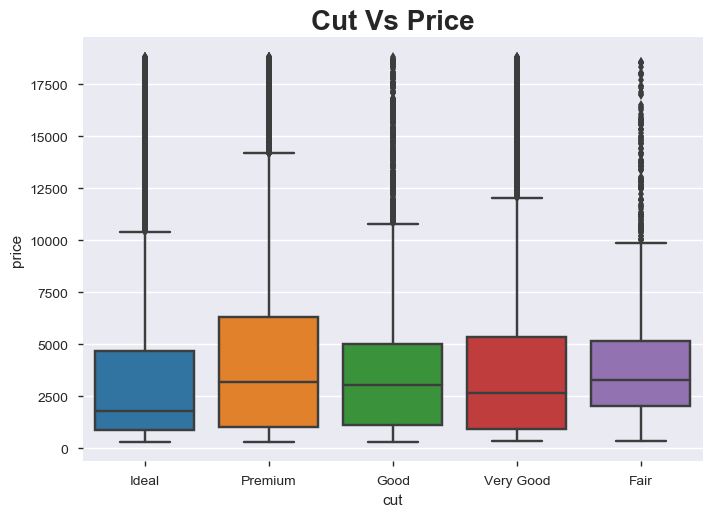

In [10]:
#diamonds.groupby(['clarity']).count()
ax = sns.boxplot(x = "cut", y = "price", data=diamonds)
plt.title('Cut Vs Price', fontsize=20, fontweight="bold")

Text(0.5,1,'Clarity Vs Price')

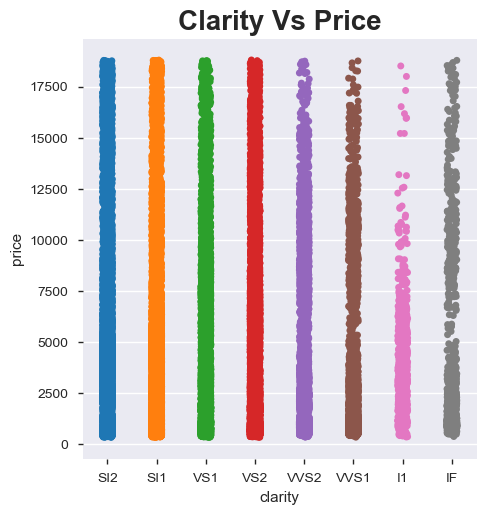

In [11]:
ax = sns.catplot(x="clarity", y="price",  data=diamonds)
plt.title('Clarity Vs Price', fontsize=20, fontweight="bold")

### 4.5 The Depth and other properties of  diamond

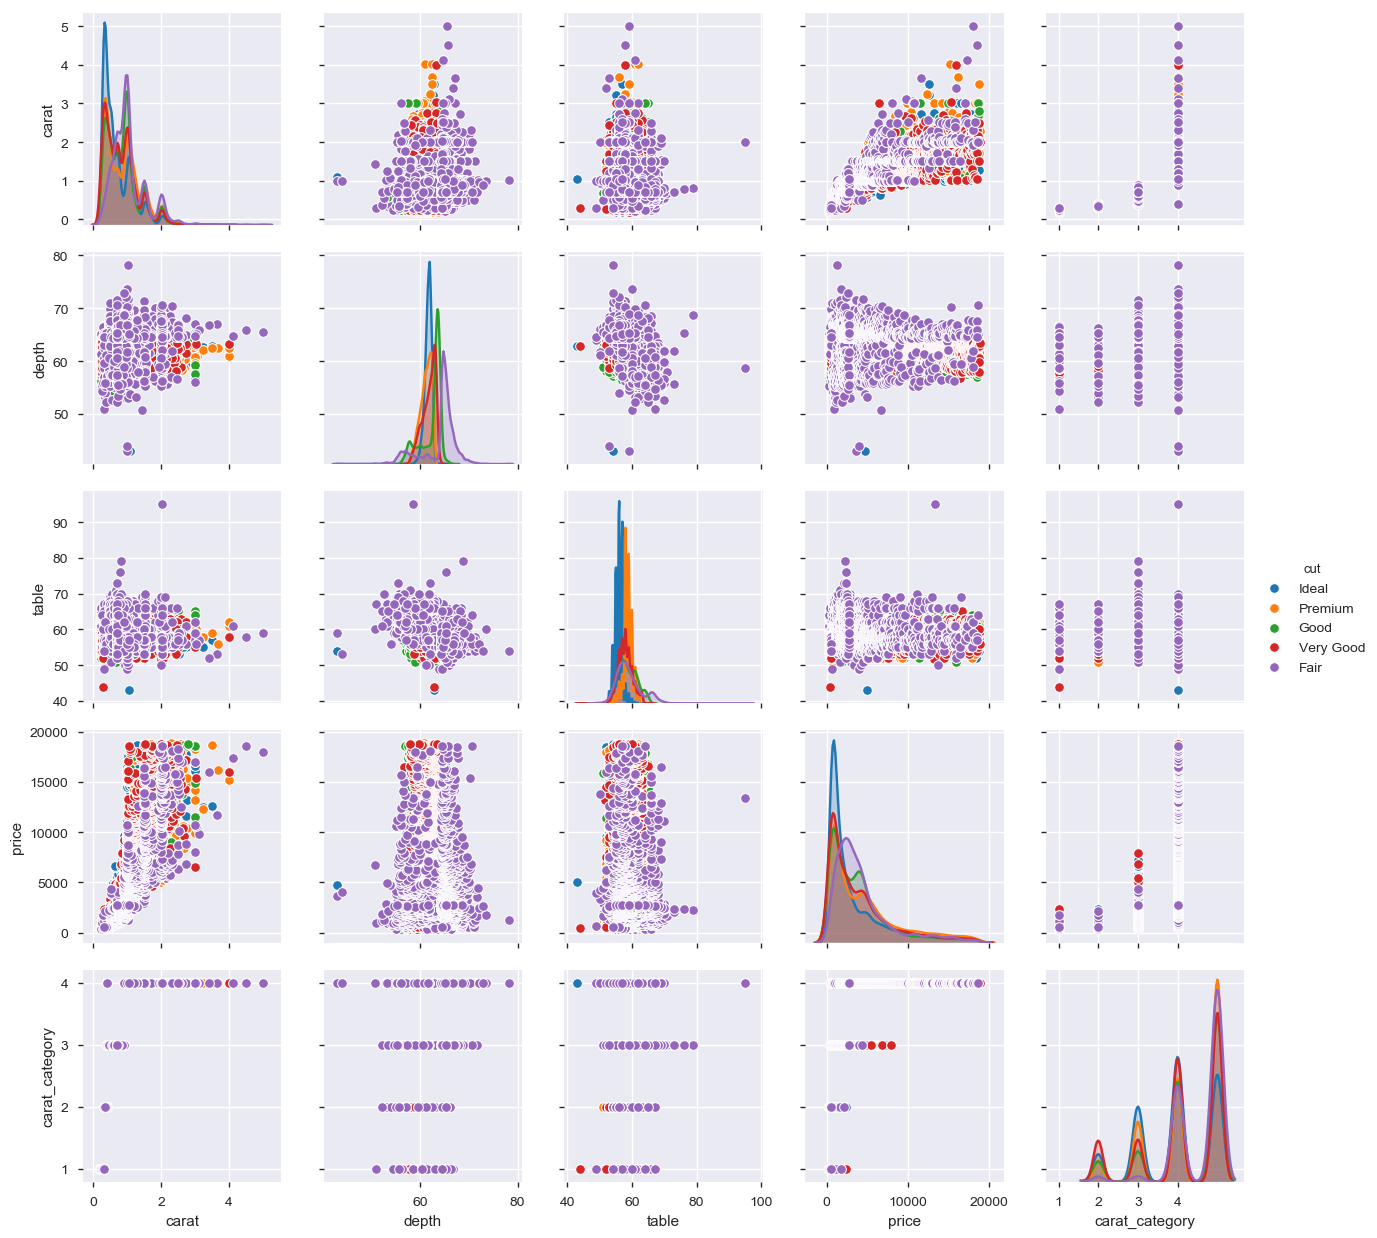

In [27]:
diamonds.head()
hm = sns.pairplot(diamonds, hue="cut")
plt.savefig('C:\\Users\\Dell\\Desktop\\DiamondsPairplot.png')

In [13]:
diamonds_new = diamonds.copy(deep=True)
diamonds_new

,carat,cut,color,clarity,depth,table,price,carat_category
0,0.23,Ideal,E,SI2,61.5,55.0,326,1
1,0.21,Premium,E,SI1,59.8,61.0,326,1
2,0.23,Good,E,VS1,56.9,65.0,327,1
3,0.29,Premium,I,VS2,62.4,58.0,334,1
4,0.31,Good,J,SI2,63.3,58.0,335,2
5,0.24,Very Good,J,VVS2,62.8,57.0,336,1
6,0.24,Very Good,I,VVS1,62.3,57.0,336,1
7,0.26,Very Good,H,SI1,61.9,55.0,337,1
8,0.22,Fair,E,VS2,65.1,61.0,337,1
9,0.23,Very Good,H,VS1,59.4,61.0,338,1


In [14]:
from sklearn.preprocessing import LabelEncoder                                    # Label encoder is used to transform non-numerical labels to numerical labels.
number = LabelEncoder()                                                           # Here as our data set consists only of categorical values except age
for i in diamonds_new.columns:                                                          # in order to find the correlation between variables, we do Label encoding 
    diamonds_new[i] = number.fit_transform(diamonds_new[i].astype('str'))

In [15]:
import numpy as np
corr=diamonds_new.corr()['carat']
corr[np.argsort(corr,axis=0)[::-1]]

carat             1.000000
carat_category    0.758993
color             0.290779
table             0.184274
depth             0.027063
cut               0.019163
price            -0.160482
clarity          -0.213301
Name: carat, dtype: float64

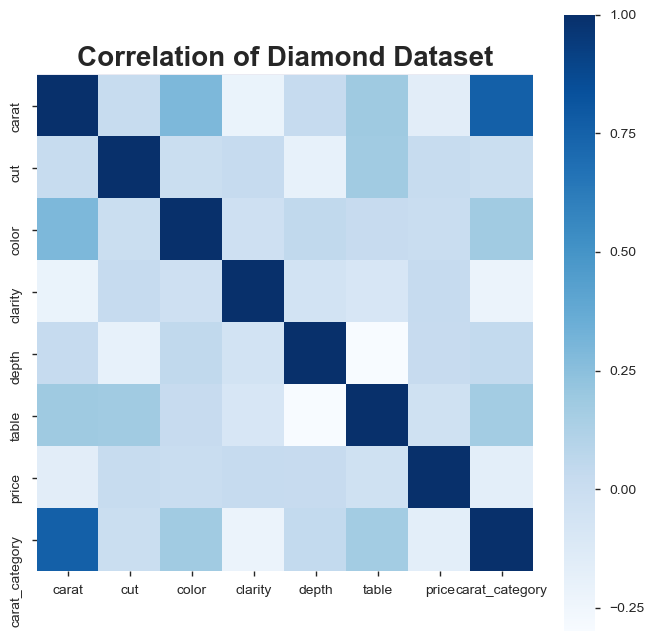

In [16]:
features_correlation = diamonds_new.corr()
plt.figure(figsize=(8,8))
sns.heatmap(features_correlation,vmax=1,square=True,annot=False,cmap='Blues')
plt.title('Correlation of Diamond Dataset', fontsize=20, fontweight="bold")
plt.show()

Text(0.5,1,'Cut (Fair)')

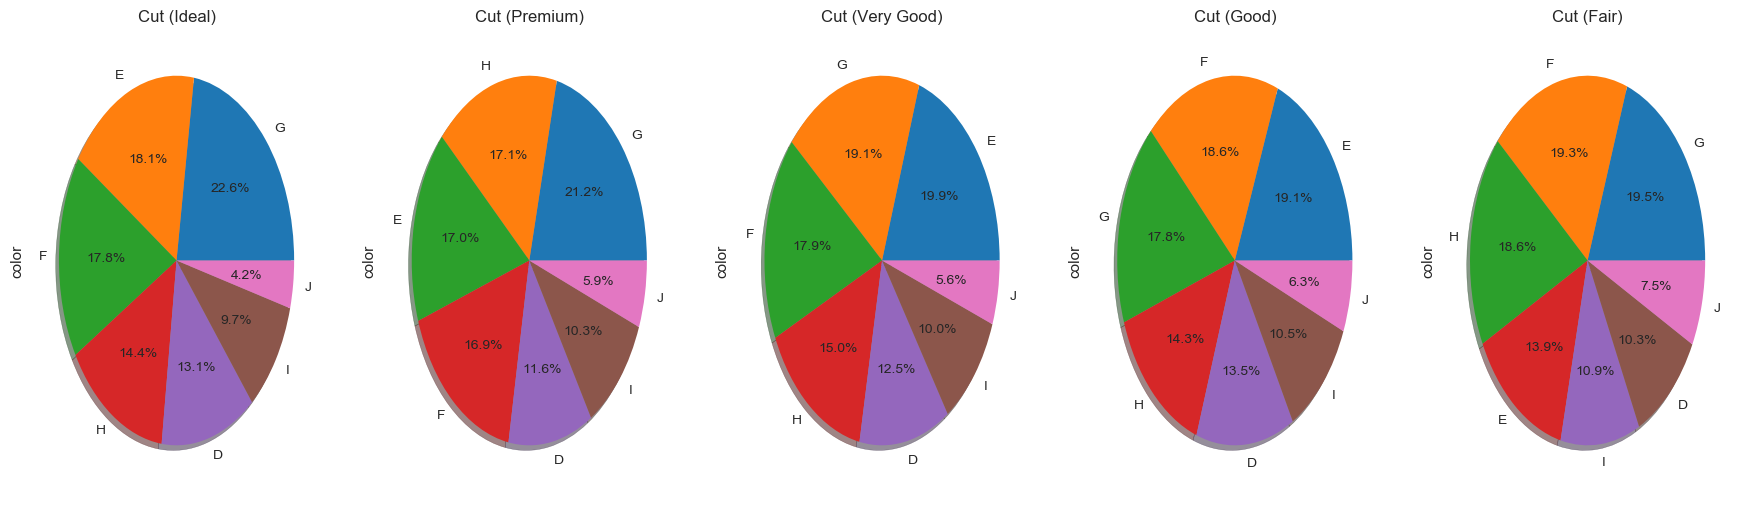

In [17]:
f,ax = plt.subplots(1,5,figsize=(22,6))
diamonds['color'][diamonds['cut'] == 'Ideal'].value_counts().plot.pie(explode=None,autopct='%1.1f%%',ax=ax[0],shadow=True)
diamonds['color'][diamonds['cut'] == 'Premium'].value_counts().plot.pie(explode=None,autopct='%1.1f%%',ax=ax[1],shadow=True)
diamonds['color'][diamonds['cut'] == 'Very Good'].value_counts().plot.pie(explode=None,autopct='%1.1f%%',ax=ax[2],shadow=True)
diamonds['color'][diamonds['cut'] == 'Good'].value_counts().plot.pie(explode=None,autopct='%1.1f%%',ax=ax[3],shadow=True)
diamonds['color'][diamonds['cut'] == 'Fair'].value_counts().plot.pie(explode=None,autopct='%1.1f%%',ax=ax[4],shadow=True)
ax[0].set_title('Cut (Ideal)')
ax[1].set_title('Cut (Premium)')
ax[2].set_title('Cut (Very Good)')
ax[3].set_title('Cut (Good)')
ax[4].set_title('Cut (Fair)')

Text(0.5,1,'Cut (Fair)')

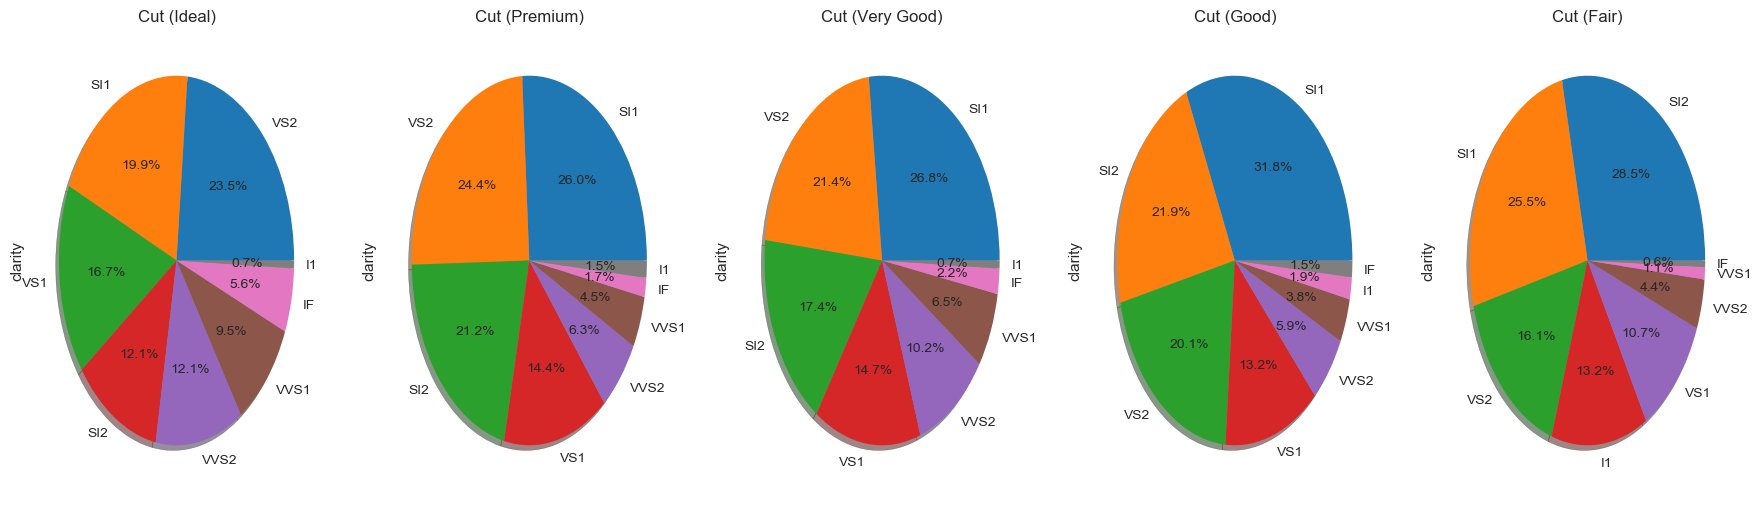

In [18]:
f,ax = plt.subplots(1,5,figsize=(22,6))
diamonds['clarity'][diamonds['cut'] == 'Ideal'].value_counts().plot.pie(explode=None,autopct='%1.1f%%',ax=ax[0],shadow=True)
diamonds['clarity'][diamonds['cut'] == 'Premium'].value_counts().plot.pie(explode=None,autopct='%1.1f%%',ax=ax[1],shadow=True)
diamonds['clarity'][diamonds['cut'] == 'Very Good'].value_counts().plot.pie(explode=None,autopct='%1.1f%%',ax=ax[2],shadow=True)
diamonds['clarity'][diamonds['cut'] == 'Good'].value_counts().plot.pie(explode=None,autopct='%1.1f%%',ax=ax[3],shadow=True)
diamonds['clarity'][diamonds['cut'] == 'Fair'].value_counts().plot.pie(explode=None,autopct='%1.1f%%',ax=ax[4],shadow=True)
plt.title('Cut Vs Clarity\n', fontsize=20, fontweight="bold")
ax[0].set_title('Cut (Ideal)')
ax[1].set_title('Cut (Premium)')
ax[2].set_title('Cut (Very Good)')
ax[3].set_title('Cut (Good)')
ax[4].set_title('Cut (Fair)')


Text(0,0.5,'Price in Rs 1000')

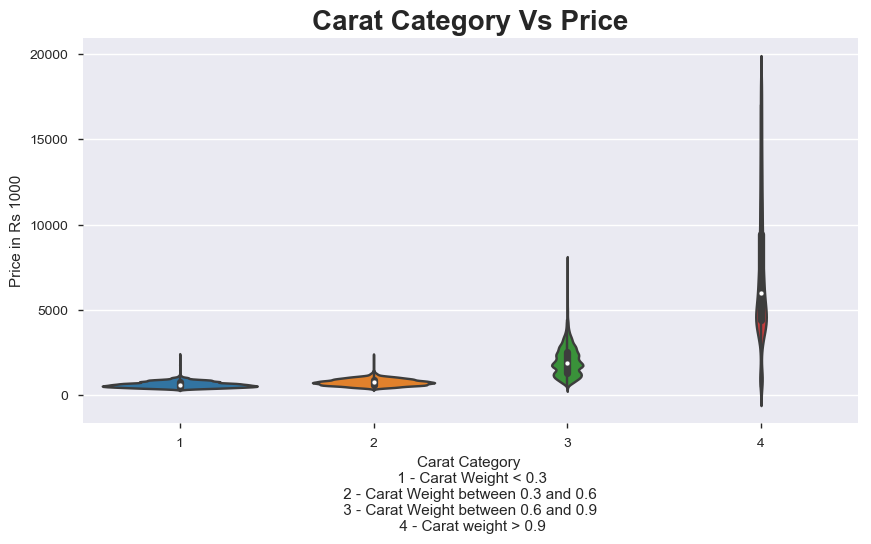

In [19]:
plt.figure(figsize=(10,5))
vplot = sns.violinplot(x="carat_category", y="price",data=diamonds)
plt.title('Carat Category Vs Price', fontsize=20, fontweight="bold")
plt.xlabel('Carat Category \n 1 - Carat Weight < 0.3\n 2 - Carat Weight between 0.3 and 0.6 \n 3 - Carat Weight between 0.6 and 0.9 \n 4 - Carat weight > 0.9')
plt.ylabel('Price in Rs 1000')

Text(0.5,1,'Clarity Vs Price')

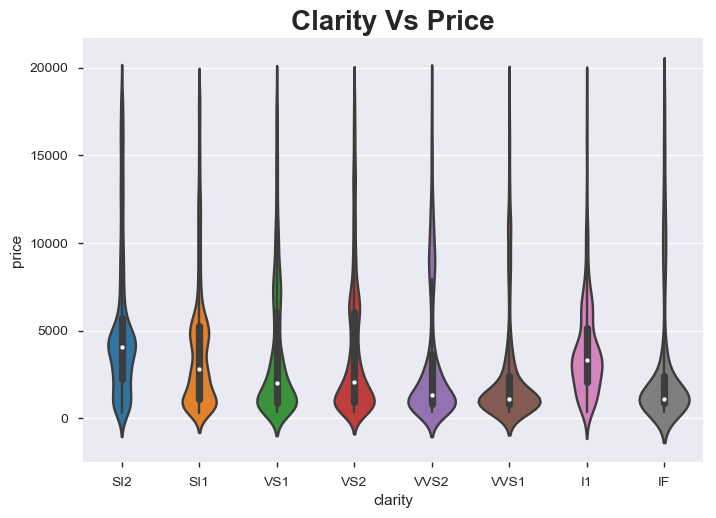

In [22]:
sns.violinplot(x="clarity", y="price",  data=diamonds)
plt.title('Clarity Vs Price',fontsize=20, fontweight="bold")

### Hypothesis

### Conclusion

## Diamonds are chosen on the following Criteria

### 1) Clarity
### 2) Carat
### 3) Color
### 4) Cut

## The price varies from each of the properties or combination of the properties

-  The price varies based on clarity,SI2,SI1,VS1,VS2 is of high price compared to VVS2,VVS1,I1,IF
-  As the carat weight is increased the price is also increased -  +ve correlation
-  The maximum colors that were sold was G, E and H
-  Premium cut Diamonds has higher price than other cuts,  mostly 
-  Fair cut is mostly preferred compared to others, the reason is ranging from INR 1500 to 5000 which also adheres quality

## The preferred  way to choose the diamond for purchase

### Clarity - refers to degree of inclusion, in this SI2 & SI1
### Carat  - the weight of the diamond optimum is 1 carat
### Color  - Preferred white diamonds (D) but this data sample has near colorless (G)
### cut    - Premium cut is preferred which is a huge factor for the color seen in the diamond